In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread("/content/images (1).jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=3,
        minSize=(30, 30)
)

print("Found {0} Faces!".format(len(faces)))

Found 1 Faces!


In [ ]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_color = image[y:y + h, x:x + w]


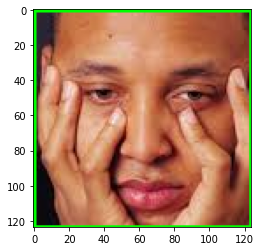

In [ ]:
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))

In [ ]:
model=load_model("/content/drive/MyDrive/emorec (1).h5")

In [ ]:
img=cv2.resize(roi_color,(227,227))
img=np.expand_dims(img,axis=0)
img=img/255.0
print(img.ndim)

4


In [ ]:
prediction=model.predict(img)

In [ ]:
prediction[0]

array([7.3481337e-03, 1.3635676e-01, 7.7342850e-01, 5.3965102e-04,
       8.2326911e-02], dtype=float32)

In [ ]:
def max_list(list):

  max=0
  for i in range(1,len(list)):
    if (list[max]<list[i]):
      max=i
    else:
      continue

  return(max)
X=max_list(prediction[0])
dict={0:"angry",1:"fear",2:"happy",2:"sadness",4:"surprise"}
X=dict.setdefault(X)
print(X)

sadness
